In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [3]:
data=pd.read_csv("LoanApprovalPrediction.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


<Axes: >

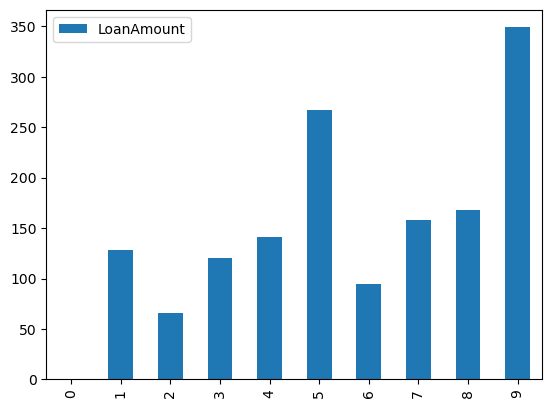

In [6]:
df=data[['Gender','LoanAmount']]
df.iloc[0:10,:].plot(kind='bar')

<Axes: >

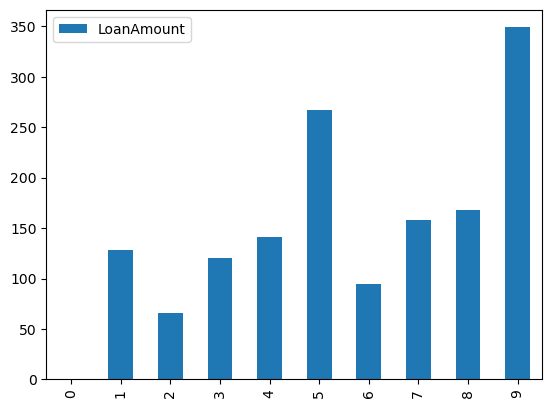

In [19]:
df=data[['Loan_ID','LoanAmount']]
df.iloc[0:10,:].plot(kind='bar')

<Axes: >

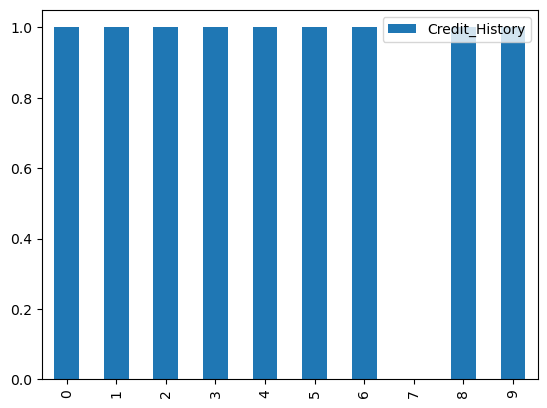

In [9]:
df=data[['Loan_ID','Credit_History']]
df.iloc[0:10,:].plot(kind='bar')

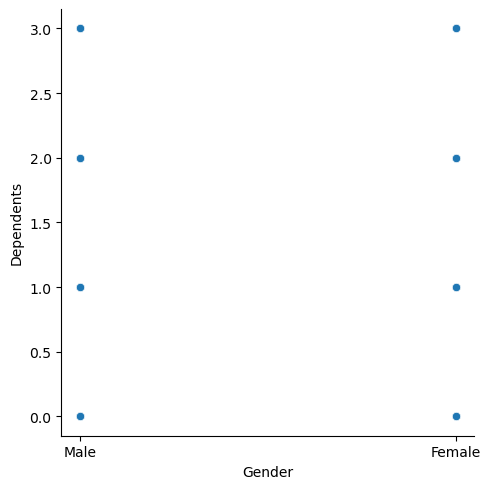

In [12]:
snr.relplot(x='Gender',y='Dependents',data=data)

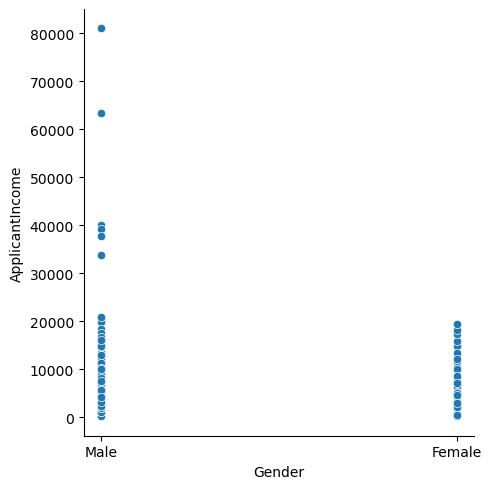

In [14]:
snr.relplot(x='Gender',y='ApplicantIncome',data=data)

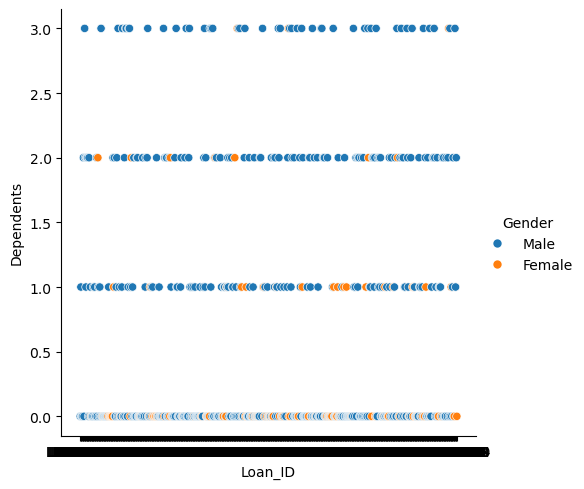

In [15]:
snr.relplot(x='Loan_ID',y='Dependents',hue='Gender',data=data)

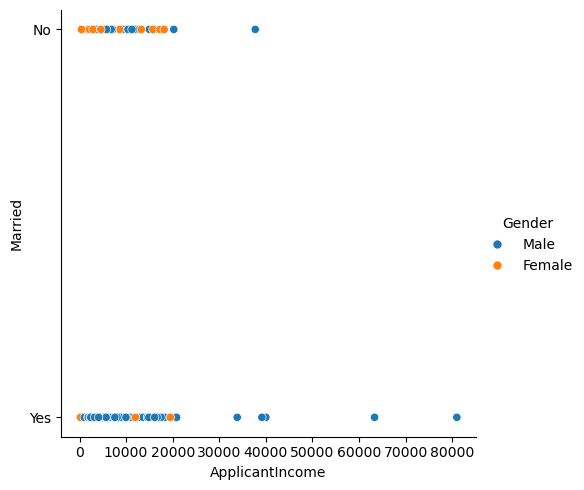

In [16]:
snr.relplot(x='ApplicantIncome',y='Married',hue='Gender',data=data)

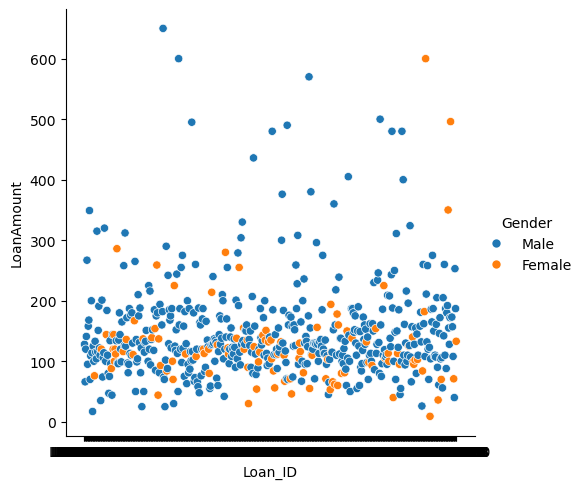

In [17]:
snr.relplot(x='Loan_ID',y='LoanAmount',hue='Gender',data=data)

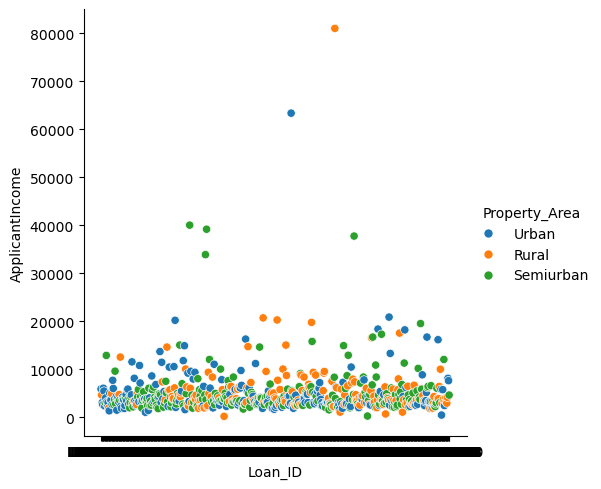

In [18]:
snr.relplot(x='Loan_ID',y='ApplicantIncome',hue='Property_Area',data=data)

In [56]:
#As part of Data Preprocessing we can:

#remove the LoanId column
#convert the categorical values to numeric
#replace the null values with the corresponding mean of the column


In [57]:
data.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
#to convert the categorical values to numeric- we have done this earlier but that was very manual approach 
#but now we will use more fast and automatic and very convenient approach

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


In [59]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [60]:
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [61]:
data['Gender'].unique()

array([1, 0])

In [62]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
data['Married']=label_encoder.fit_transform(data['Married'])

In [64]:
data['Married'].unique()

array([0, 1])

In [65]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [66]:
data['Education']=label_encoder.fit_transform(data['Education'])

In [67]:
data['Education'].unique()

array([0, 1])

In [68]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
data['Self_Employed']=label_encoder.fit_transform(data['Self_Employed'])

In [70]:
data['Self_Employed'].unique()

array([0, 1])

In [71]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [72]:
data['Property_Area']=label_encoder.fit_transform(data['Property_Area'])

In [73]:
data['Property_Area'].unique()

array([2, 0, 1])

In [74]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [75]:
data['Loan_Status']=label_encoder.fit_transform(data['Loan_Status'])

In [76]:
data['Loan_Status'].unique()

array([1, 0])

In [77]:
df=data.drop(['Loan_ID'],axis=1)

In [78]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [79]:
#replacing null values with the mean of that column
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())
    

In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [81]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
x=df.drop(['Loan_Status'],axis=1) #independent variables
y=df['Loan_Status'] #dependent variable

In [85]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.90)

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [108]:
model.fit(x_train,y_train)

C:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
y_hat=model.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_hat)

In [111]:
print(ac)

0.85
